# Installing Mediapipe

In [1]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Required Libraries

In [2]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow
import itertools
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

# Loading Data

In [3]:
if os.path.isfile('/content/AFLW2000-3D.zip') == False:
  !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
  !unzip /content/AFLW2000-3D.zip

In [4]:
Imgs_list = [Path(i).stem for i in glob.glob("/content/AFLW2000/*.jpg")]
folder = "/content/AFLW2000/"

In [5]:
print("Number of Image files = ",len(Imgs_list))

Number of Image files =  2000


# Feature Extraction

In [54]:
def Extract_data_Img(folder,Imgs_list,extantion='.jpg',Static =True,Num_faces = 1):
  faceModule = mp.solutions.face_mesh
  idx=[]
  face_xy=[]
  face_2d=[]
  for img in Imgs_list:
    with faceModule.FaceMesh(static_image_mode=Static,min_detection_confidence=0.5,min_tracking_confidence=0.5,max_num_faces=Num_faces) as faces:
      image = cv2.imread(folder+img+extantion)
      results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      if results.multi_face_landmarks != None:
        nose_x = results.multi_face_landmarks[0].landmark[4].x
        nose_y = results.multi_face_landmarks[0].landmark[4].y
        point_x = abs(results.multi_face_landmarks[0].landmark[4].x-results.multi_face_landmarks[0].landmark[263].x)
        point_y = abs(results.multi_face_landmarks[0].landmark[4].y-results.multi_face_landmarks[0].landmark[263].y)
        idx.append(img)
        for face in results.multi_face_landmarks:
          for landmark in face.landmark:
            x = landmark.x
            y = landmark.y
            face_xy.append([((nose_x-x)/point_x),((nose_y-y)/point_y)])
        face_xy = np.array(face_xy, dtype=np.float64).ravel().reshape(1,2*len(face_xy))
        face_2d.append(face_xy)
        face_xy=[]
  columns_2d=list(range(0,face_2d[0][0].shape[0],1))
  features_2d = pd.concat([pd.DataFrame(face_2d[i][0].reshape(1,face_2d[0][0].shape[0]),columns=columns_2d) for i in range(0,len(face_2d))])
  features_2d = features_2d.reset_index(drop=True)
  return features_2d,idx

In [55]:
def git_output(folder,list_mat):
  pitch=[]
  yaw=[]
  roll=[]
  df = pd.DataFrame()
  for mat in list_mat:
    mat_file = sio.loadmat(folder+mat+'.mat')
    pose_para = mat_file["Pose_Para"][0][:3]
    pitch.append(pose_para[0])
    yaw.append(pose_para[1])
    roll.append(pose_para[2])
  df['pitch']=pitch
  df['yaw']=yaw
  df['roll']=roll
  return df

In [56]:
X,mat_list = Extract_data_Img(folder,Imgs_list,extantion='.jpg')

In [57]:
X

,0,1,2,3,4,5,6,7,8,9,...,926,927,928,929,930,931,932,933,934,935
0,-0.043224,-0.842805,-0.007899,-0.199816,-0.031603,-0.416134,0.097598,0.403845,0.0,0.0,...,-0.360291,0.866490,-0.284441,0.822763,-0.238499,0.797113,-0.963179,1.041605,-1.025888,1.105524
1,-0.228879,-0.465441,-0.032445,-0.114880,-0.215355,-0.187833,-0.047289,0.332988,0.0,0.0,...,-0.526085,0.890797,-0.464595,0.827001,-0.406560,0.767392,-0.958532,0.996111,-1.018647,1.119292
2,-0.048696,-0.406298,-0.012308,-0.114236,-0.018996,-0.171694,0.151355,0.322462,0.0,0.0,...,-0.284096,0.819684,-0.210554,0.771719,-0.173308,0.728072,-0.969515,1.014966,-1.027858,1.053822
3,-0.050364,-1.491148,0.003389,-0.333601,-0.098724,-0.730491,-0.073263,0.834894,0.0,0.0,...,-0.549852,1.442249,-0.490857,1.390518,-0.440525,1.340885,-0.974539,1.079056,-1.032843,1.157924
4,0.225812,-1.014926,0.059092,-0.200627,0.074642,-0.619110,-0.123761,0.330644,0.0,0.0,...,-0.609049,-0.152886,-0.544414,-0.072430,-0.497186,0.001798,-0.983774,-0.894093,-1.063643,-0.913280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,0.048311,-7.135740,0.023433,-1.569426,-0.034317,-3.963839,-0.083291,2.994622,0.0,0.0,...,-0.557542,3.699994,-0.495917,3.715540,-0.446599,3.786512,-0.973187,1.532843,-1.044821,1.903510
1849,-0.218311,-0.547501,-0.032063,-0.140320,-0.133773,-0.250635,0.097657,0.317835,0.0,0.0,...,-0.353878,0.793667,-0.287743,0.750249,-0.239839,0.715737,-0.955486,1.013856,-1.019040,1.079149
1850,0.760532,-0.446981,0.104793,-0.115398,0.615528,-0.161602,0.400895,0.360690,0.0,0.0,...,0.082527,0.911251,0.153257,0.852880,0.132957,0.796048,-0.990399,1.001321,-1.121300,1.075031
1851,0.076582,-9.368867,0.028461,-2.016787,-0.014465,-5.156043,-0.083897,3.743558,0.0,0.0,...,-0.560381,4.416277,-0.498194,4.452999,-0.447857,4.584064,-0.973483,1.720193,-1.049312,2.169017


In [58]:
Y = git_output(folder,mat_list)

In [59]:
Y

,pitch,yaw,roll
0,0.075391,0.066288,-0.076080
1,-0.514121,0.752342,-0.341487
2,-0.347319,-0.027759,-0.091287
3,-0.029032,0.567679,0.240908
4,0.442086,0.223025,0.786156
...,...,...,...
1848,0.210636,0.667445,0.484012
1849,-0.119610,0.249940,-0.192510
1850,-0.537956,-0.478792,0.254959
1851,0.282187,0.604873,0.474036


# Model 

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
rfr=RandomForestRegressor()
model1 = MultiOutputRegressor(estimator=rfr,n_jobs=-1)
model1.fit(X_train, y_train)
display(model1.score(X_train, y_train))

0.8851260918899806

In [115]:
from sklearn.metrics import mean_squared_error
ypred = model1.predict(X_test)
print("Pitch MSE:%.4f" % mean_squared_error(y_test[["pitch"]], ypred[:,0]))
print("Yaw MSE:%.4f" % mean_squared_error(y_test[["yaw"]], ypred[:,1]))
print("Roll MSE:%.4f" % mean_squared_error(y_test[["roll"]], ypred[:,2]))

Pitch MSE:0.9127
Yaw MSE:0.0672
Roll MSE:0.4741


# Prediction Function

In [116]:
def get_PYR(model,features):
  predict = model.predict(features)
  pitch = predict[0][0]
  yaw =predict[0][1]
  roll =predict[0][2]
  return pitch,yaw,roll

In [117]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None,frame=False, size = 100,extention = '.jpg'):
    faceModule = mp.solutions.face_mesh
    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
      with faceModule.FaceMesh(static_image_mode=True,min_detection_confidence=0.5,min_tracking_confidence=0.5, max_num_faces=1) as faces:
        if frame == False:
          img = cv2.imread(img+extention)
        results = faces.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        tdx = int(results.multi_face_landmarks[0].landmark[4].x * img.shape[1])
        tdy = int(results.multi_face_landmarks[0].landmark[4].y * img.shape[0])


    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)
    return img

In [118]:
def Video_marks(video,model):
  faceModule = mp.solutions.face_mesh
  if (video.isOpened()== False):
    print("Error opening video  file")

  # Metadata from the input video
  frames_per_second = int(video.get(cv2.CAP_PROP_FPS))
  frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
  frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
  print('Metadata from input video:',
      '\nFrames per second:', frames_per_second,
      '\nFrame width:', frame_width, 
      '\nFrame height:', frame_height)
  out = cv2.VideoWriter('out.avi',cv2.VideoWriter_fourcc(*'MJPG'),10,(frame_width,frame_height))
  while (video.isOpened()):                                         
        ret, frame = video.read()
        if ret == True:
            face_xy=[]
            face_2d=[] 
            with faceModule.FaceMesh(static_image_mode=True, max_num_faces=1,min_detection_confidence=0.5,min_tracking_confidence=0.5) as faces:
              results = faces.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
              if results.multi_face_landmarks != None:
                nose_x = results.multi_face_landmarks[0].landmark[4].x
                nose_y = results.multi_face_landmarks[0].landmark[4].y
                point_x = abs(results.multi_face_landmarks[0].landmark[4].x-results.multi_face_landmarks[0].landmark[263].x)
                point_y = abs(results.multi_face_landmarks[0].landmark[4].y-results.multi_face_landmarks[0].landmark[263].y)
                for face in results.multi_face_landmarks:
                  for landmark in face.landmark:
                    x = landmark.x
                    y = landmark.y
                    face_xy.append([(nose_x-x)/point_x, (nose_y-y)/point_y])
                face_xy = np.array(face_xy, dtype=np.float64).ravel().reshape(1,2*len(face_xy))
                face_2d.append(face_xy)
                face_xy=[]
                columns=list(range(0,face_2d[0][0].shape[0],1))
                features = pd.concat([pd.DataFrame(face_2d[i][0].reshape(1,face_2d[0][0].shape[0]),columns=columns) for i in range(0,len(face_2d))])
                features = features.reset_index(drop=True)
                pitch,yaw,roll = get_PYR(model,features)
                frames = draw_axis(frame,pitch,yaw,roll,frame=True)
                out.write(frames)
              else:
                out.write(frame)
        else:
          break
  out.release()
  video.release()
  cv2.destroyAllWindows()
  return
            

# Testing

## Image

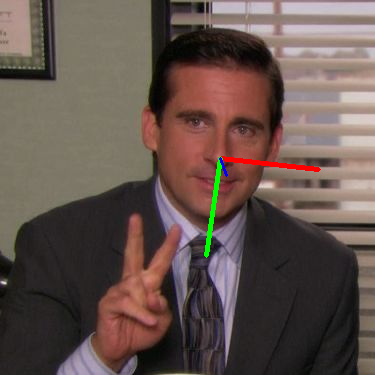

In [120]:
test1 = "d2386f6826840fbfeaf07bb0cbff2896"
folder1 ="/content/"
Features,_ = Extract_data_Img(folder1,[test1])
pitch,yaw,roll =get_PYR(model1,Features)
cv2_imshow(draw_axis(test1,pitch,yaw,roll,size=100))

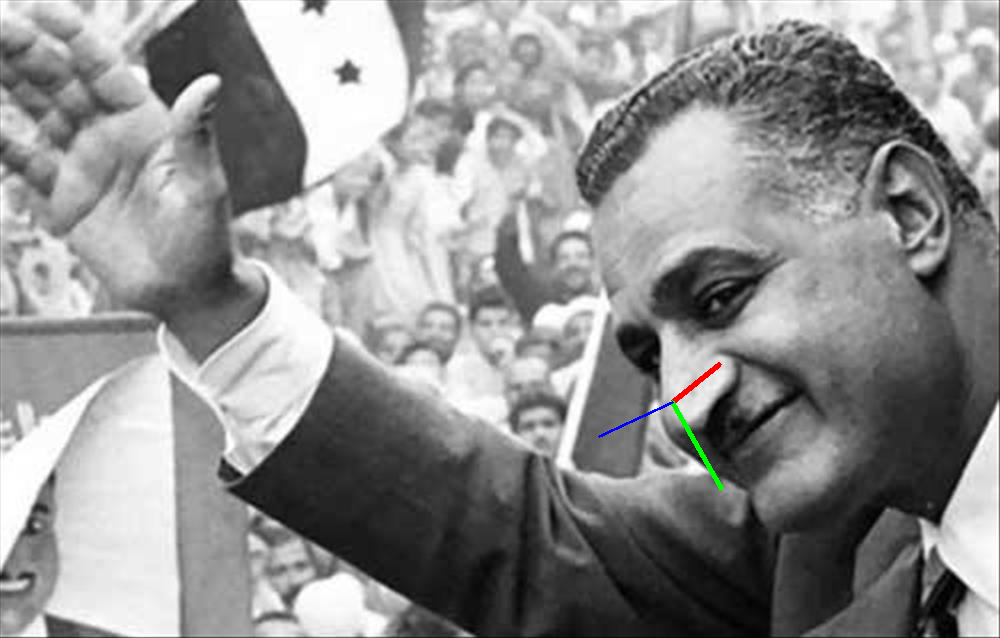

In [121]:
test2 = "20180115022939739"
Features,_ = Extract_data_Img(folder1,[test2])
pitch,yaw,roll =get_PYR(model1,Features)
cv2_imshow(draw_axis(test2,pitch,yaw,roll,size=100))

## Video

In [122]:
video_test = cv2.VideoCapture('/content/test.mp4')
Video_marks(video_test,model1)

Metadata from input video: 
Frames per second: 30 
Frame width: 1280 
Frame height: 720
